In [1]:
%load_ext autoreload
%autoreload 2

# Problem 1

# Problem 2

# Problem 3

# Problem 4

# Problem 5

In [2]:
#import necessary modules
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch import optim as optim
# for visualization
from matplotlib import pyplot as plt
import math
import numpy as np

In [3]:
from gan import *

In [4]:
# tells PyTorch to use an NVIDIA GPU, if one is available.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [5]:
# loading the dataset
training_parameters = {
    "img_size": 28,
    "n_epochs": 24,
    "batch_size": 64,
    "learning_rate_generator": 0.0002,
    "learning_rate_discriminator": 0.0002,
}
# define a transform to 1) scale the images and 2) convert them into tensors
transform = transforms.Compose([
    transforms.Resize(training_parameters['img_size']), # scales the smaller edge of the image to have this size
    transforms.ToTensor(),
])

# load the dataset
train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST(
        './data', # specifies the directory to download the datafiles to, relative to the location of the notebook.
        train = True,
        download = True,
        transform = transform),
    batch_size = training_parameters["batch_size"],
    shuffle=True
    )

# Fashion MNIST has 10 classes, just like MNIST. Here's what they correspond to:
label_descriptions = {
      0: 'T-shirt/top',
      1: 'Trouser',
      2: 'Pullover',
      3: 'Dress',
      4: 'Coat',
      5: 'Sandal',
      6: 'Shirt',
      7: 'Sneaker',
      8: 'Bag',
      9: 'Ankle boot'
}

Training Steps Completed:  499
Epoch 0: loss_d: 0.2192910760641098, loss_g: 2.6025209426879883
Training Steps Completed:  499
Epoch 1: loss_d: 0.1562013179063797, loss_g: 2.4110300540924072
Training Steps Completed:  499
Epoch 2: loss_d: 0.1390315145254135, loss_g: 2.356140375137329
Training Steps Completed:  499
Epoch 3: loss_d: 0.1613817811012268, loss_g: 2.2701871395111084
Training Steps Completed:  499
Epoch 4: loss_d: 0.1706484705209732, loss_g: 2.226733922958374
Training Steps Completed:  499
Epoch 5: loss_d: 0.16503597795963287, loss_g: 2.174633502960205
Training Steps Completed:  499
Epoch 6: loss_d: 0.16315466165542603, loss_g: 2.2818150520324707
Training Steps Completed:  499
Epoch 7: loss_d: 0.17456777393817902, loss_g: 2.1132524013519287
Training Steps Completed:  499
Epoch 8: loss_d: 0.1670546978712082, loss_g: 2.1353724002838135
Training Steps Completed:  499
Epoch 9: loss_d: 0.16016381978988647, loss_g: 2.0863423347473145
Training Steps Completed:  499
Epoch 10: loss_d: 

<ipython-input-6-5fd7a1c94187>:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(batch_sqrt, batch_sqrt, figsize=(15, 15))


Epoch 20: loss_d: 0.19321361184120178, loss_g: 1.7861093282699585
Training Steps Completed:  499
Epoch 21: loss_d: 0.18272222578525543, loss_g: 1.9240529537200928
Training Steps Completed:  499
Epoch 22: loss_d: 0.19360041618347168, loss_g: 1.7890809774398804
Training Steps Completed:  499
Epoch 23: loss_d: 0.19752706587314606, loss_g: 1.776318073272705


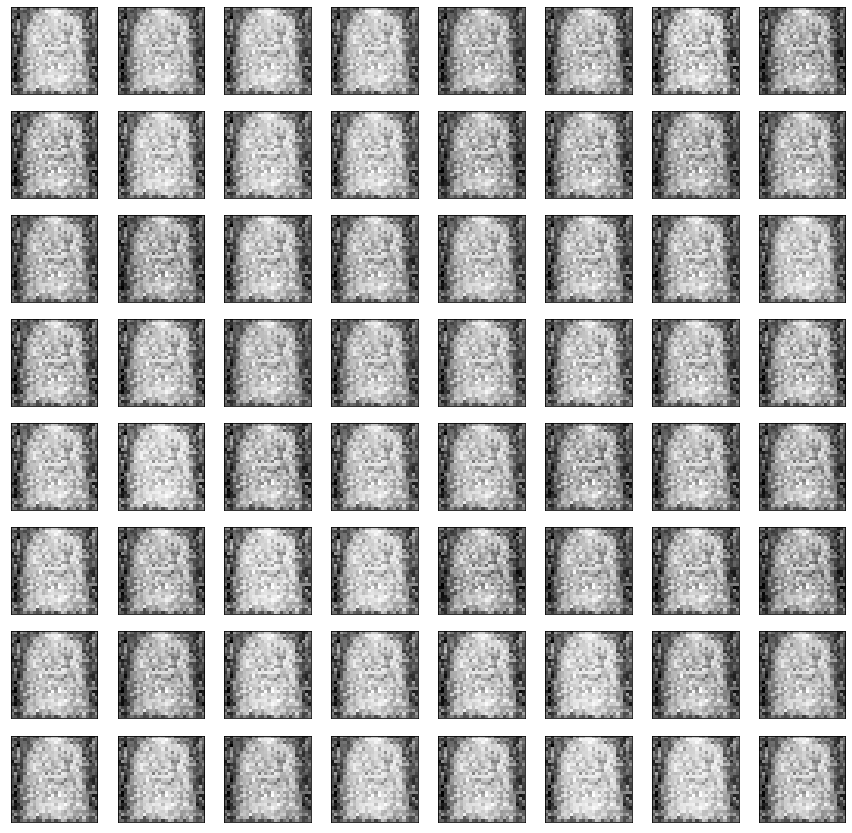

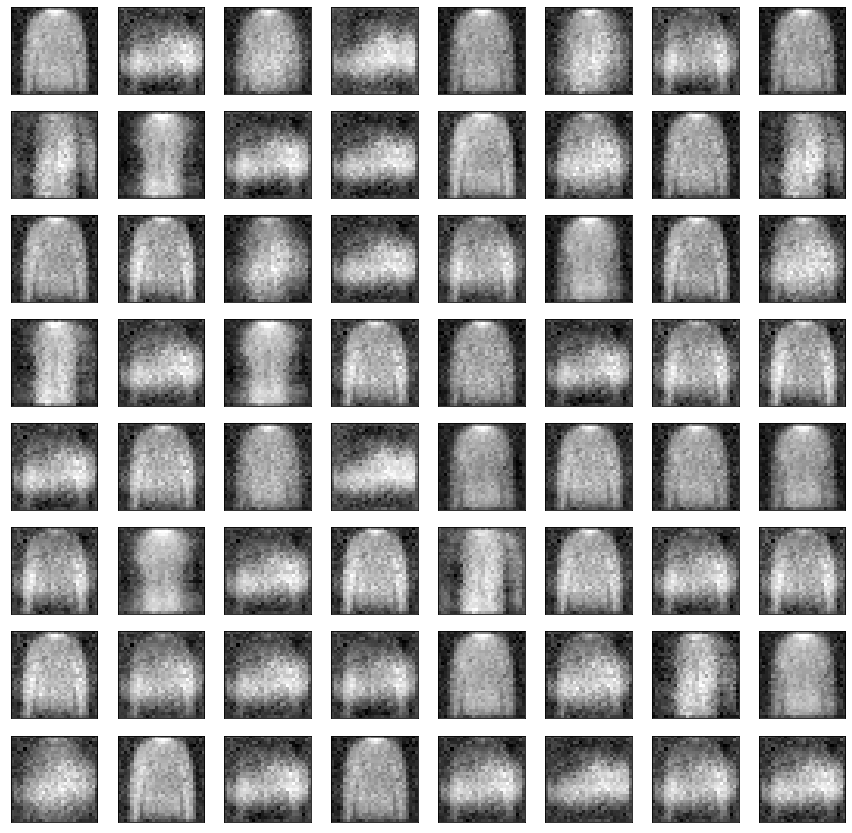

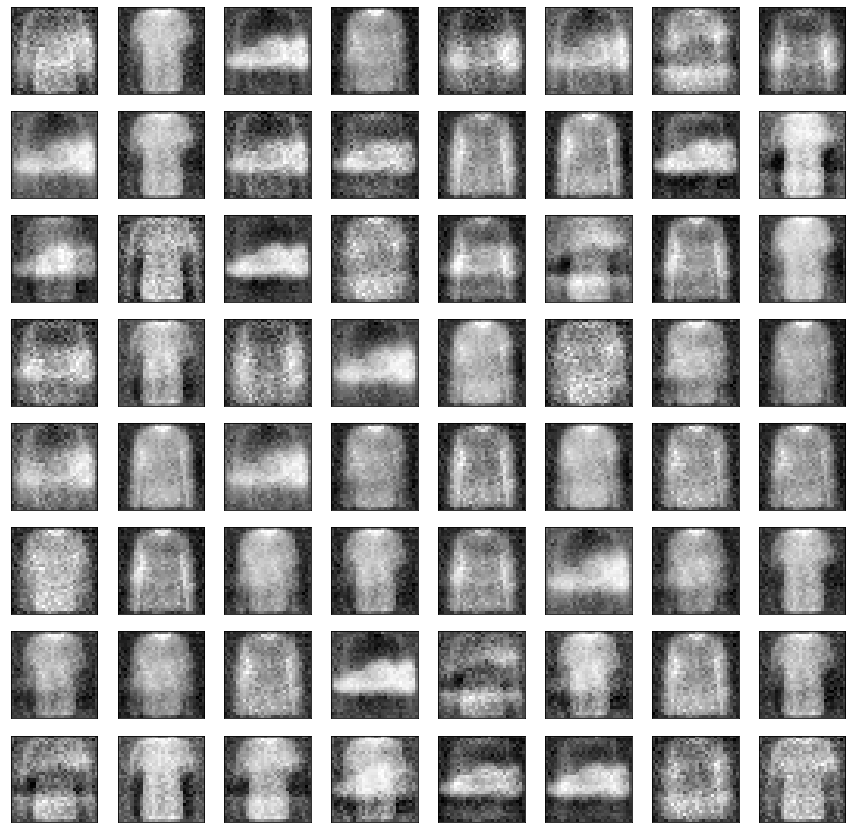

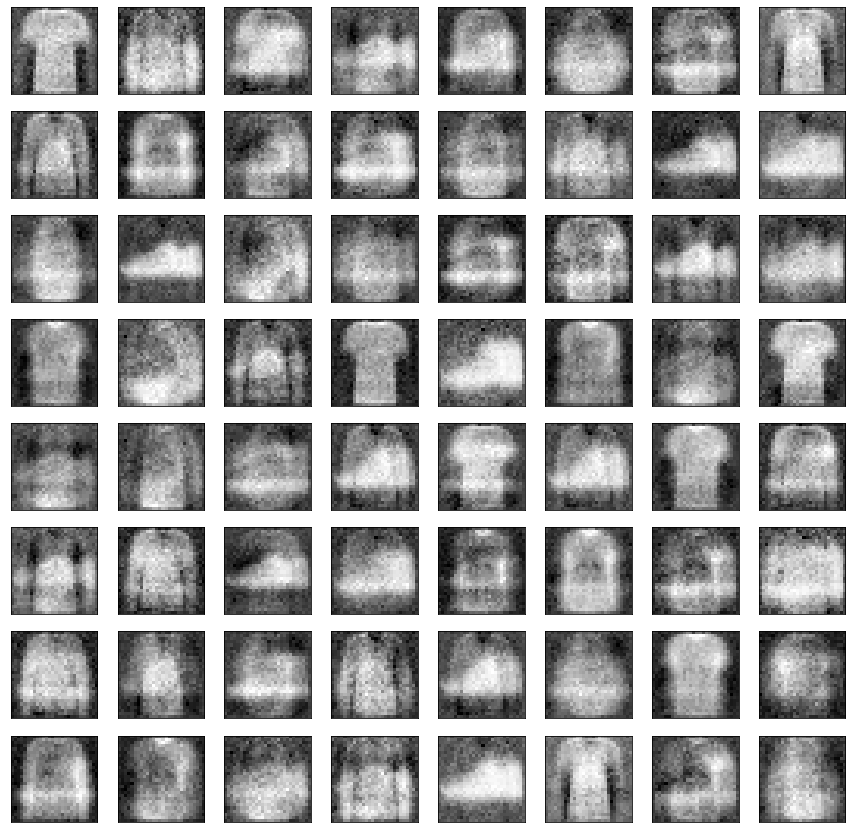

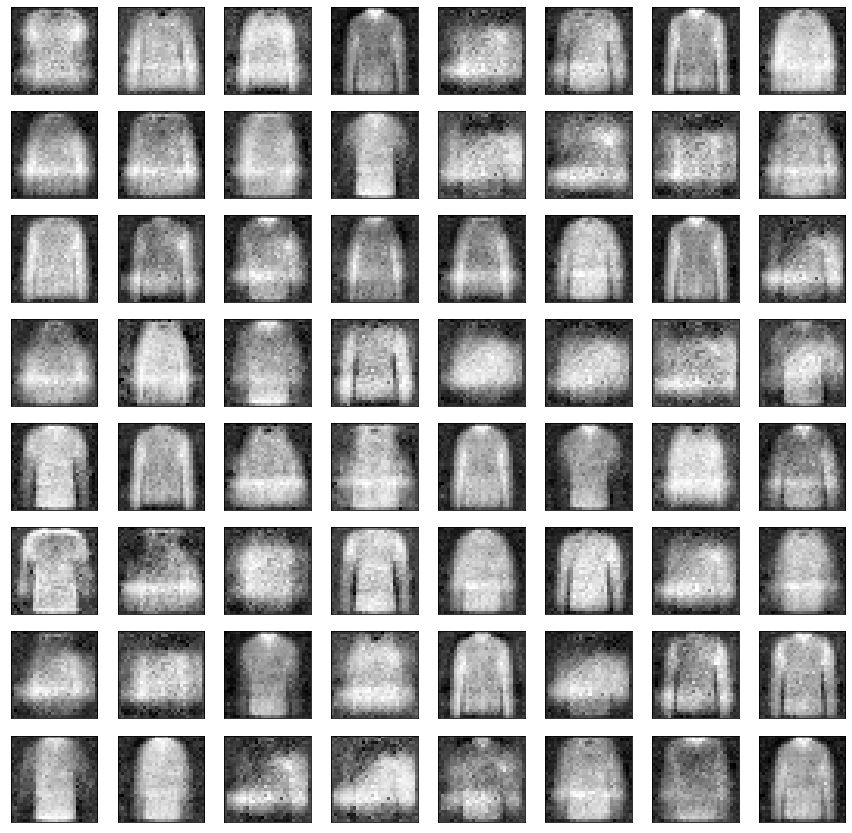

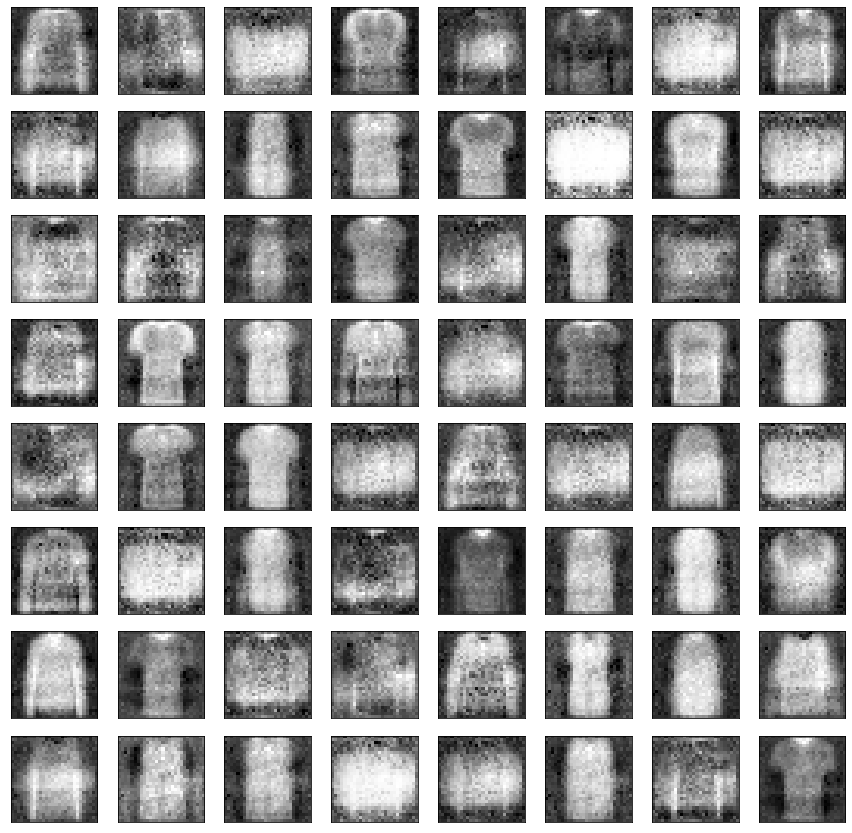

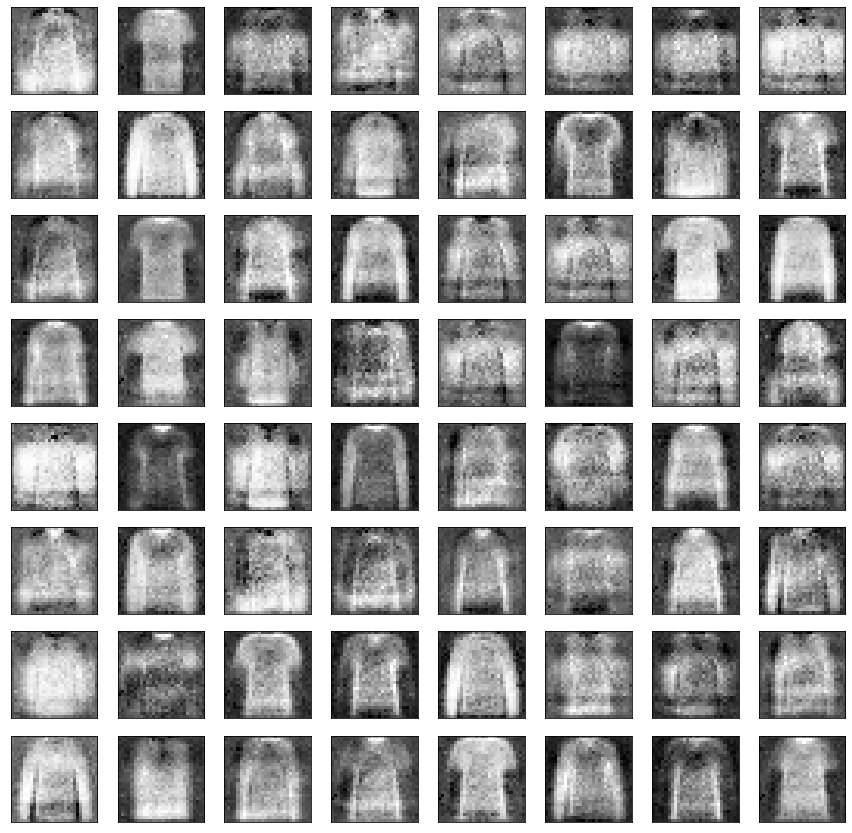

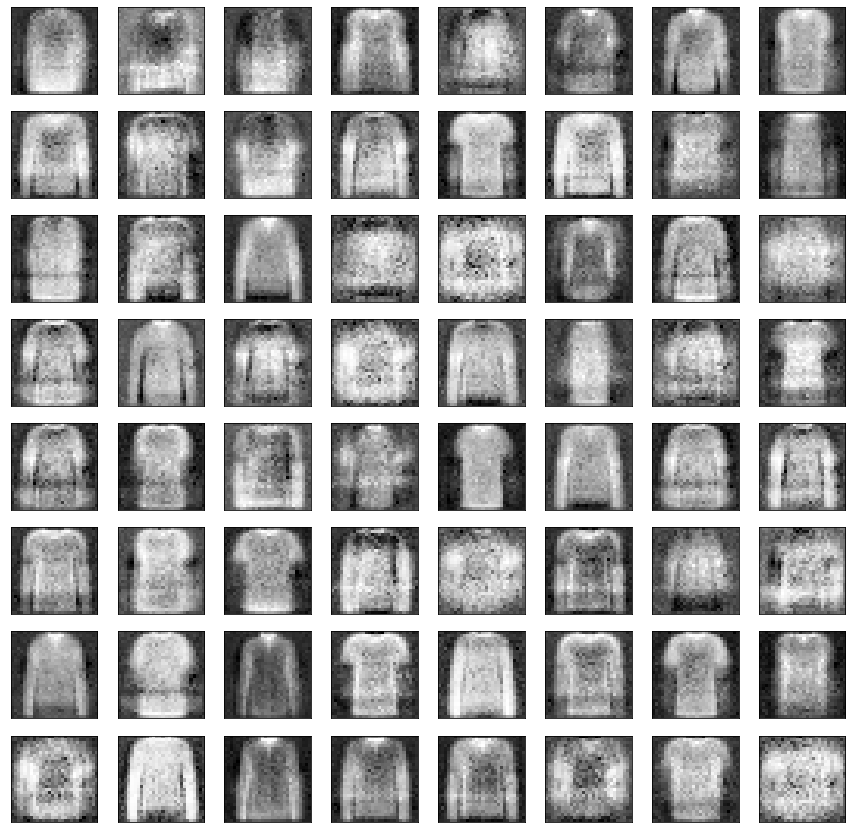

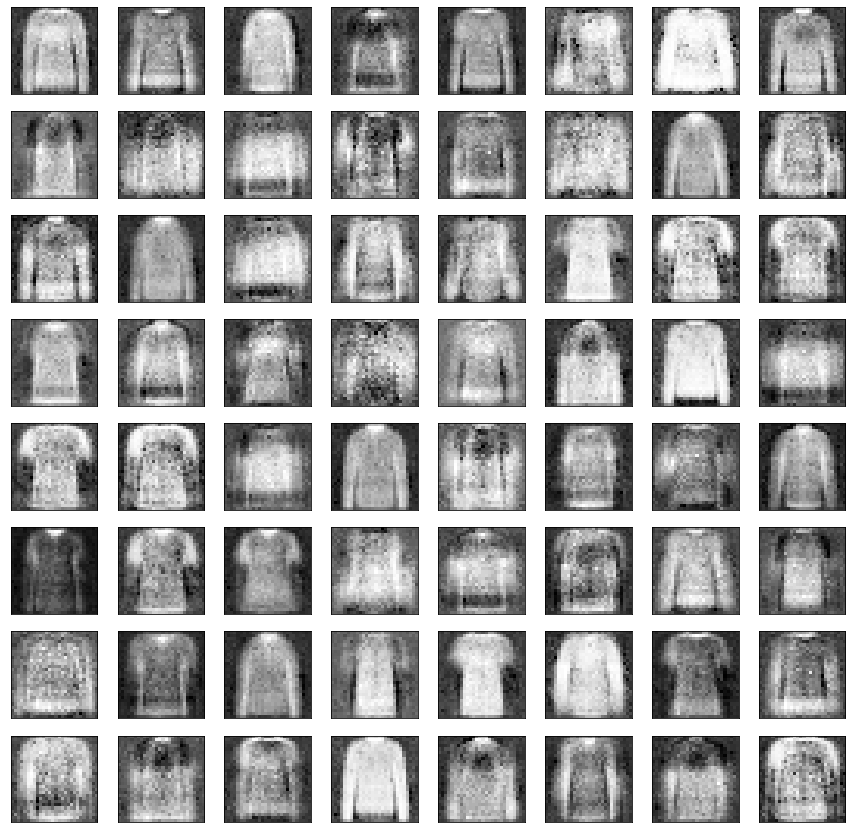

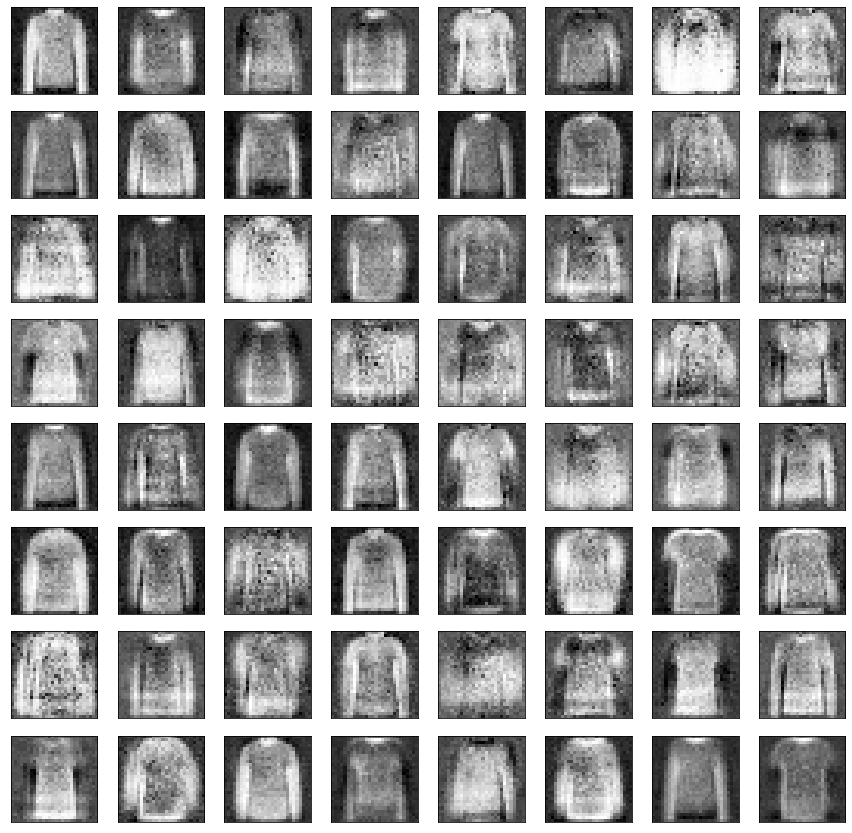

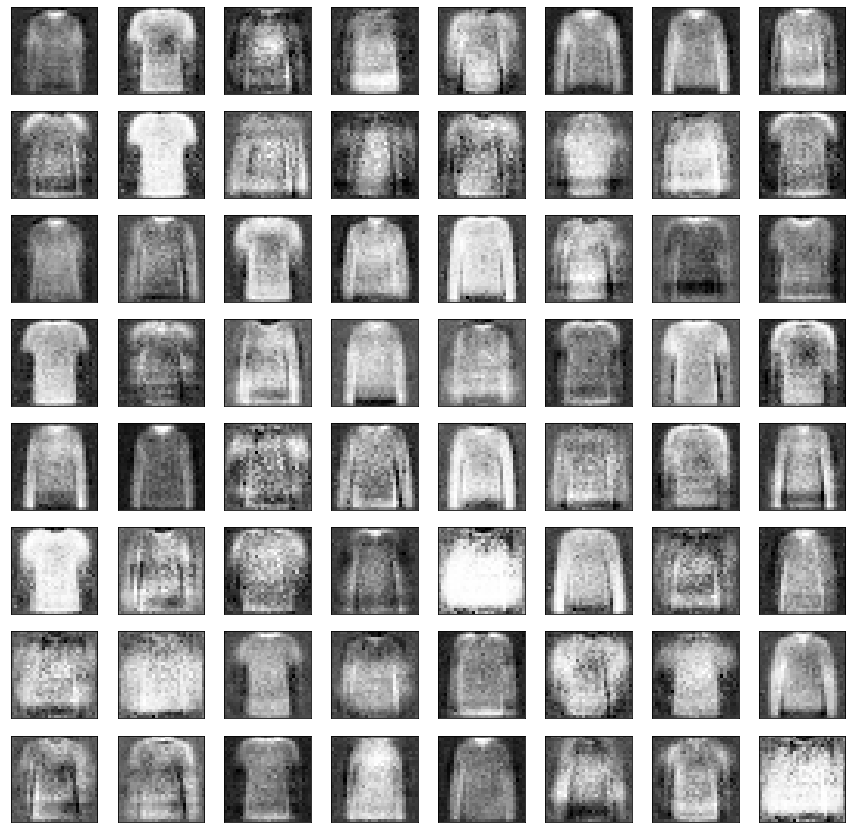

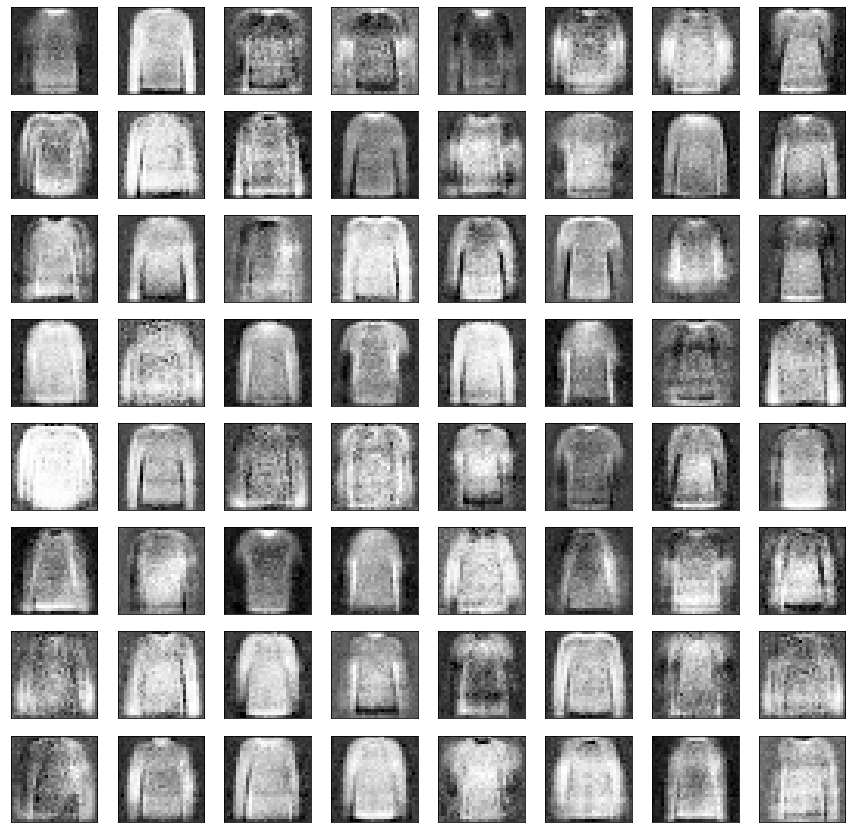

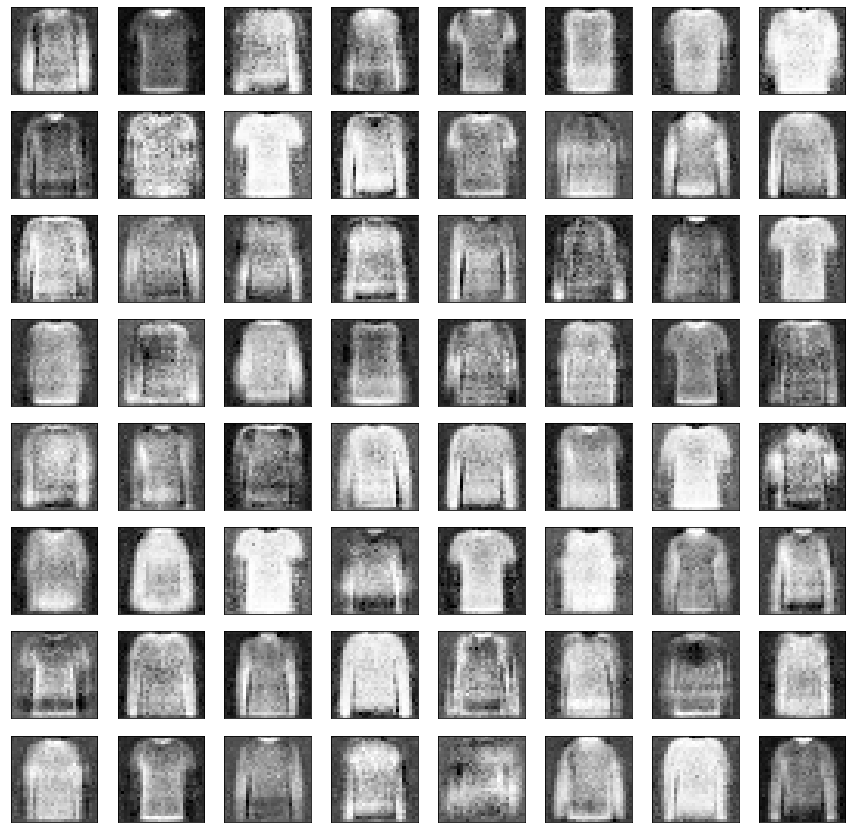

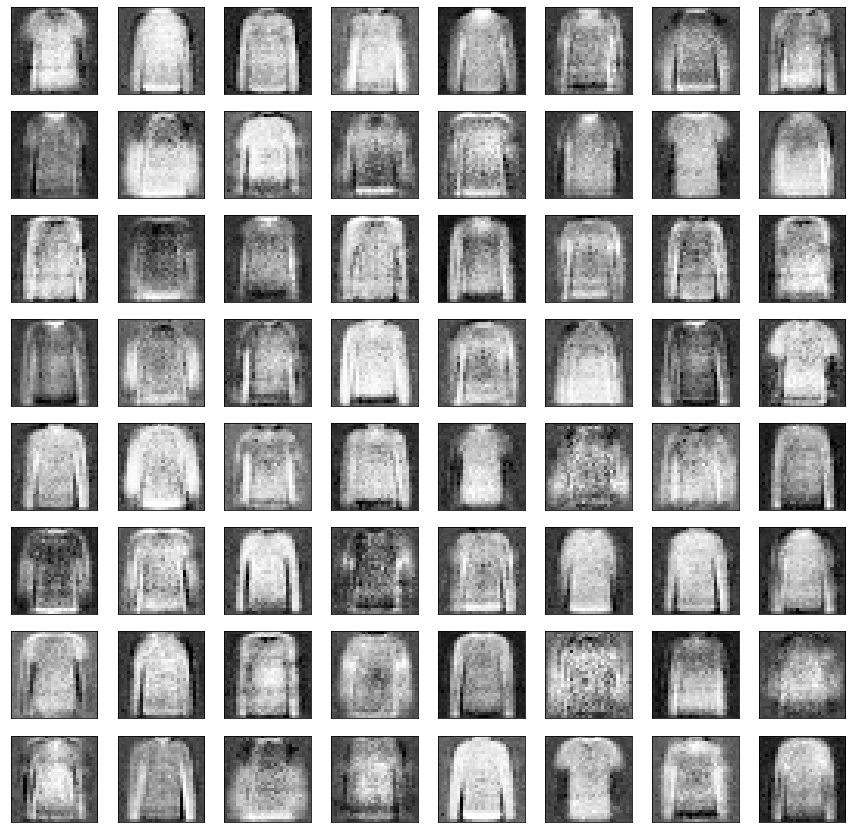

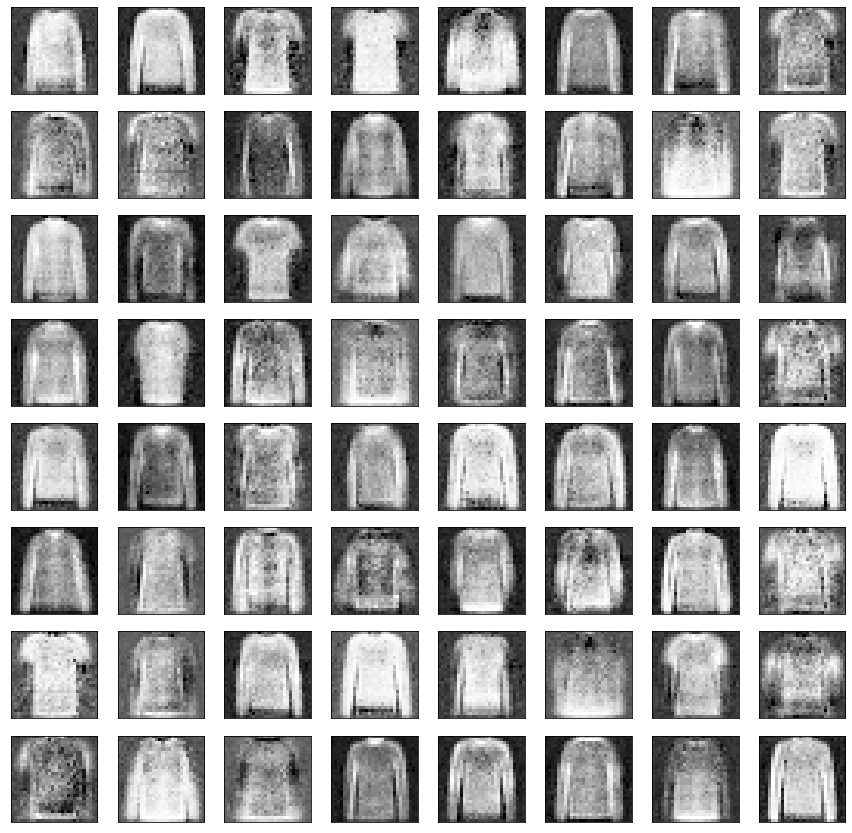

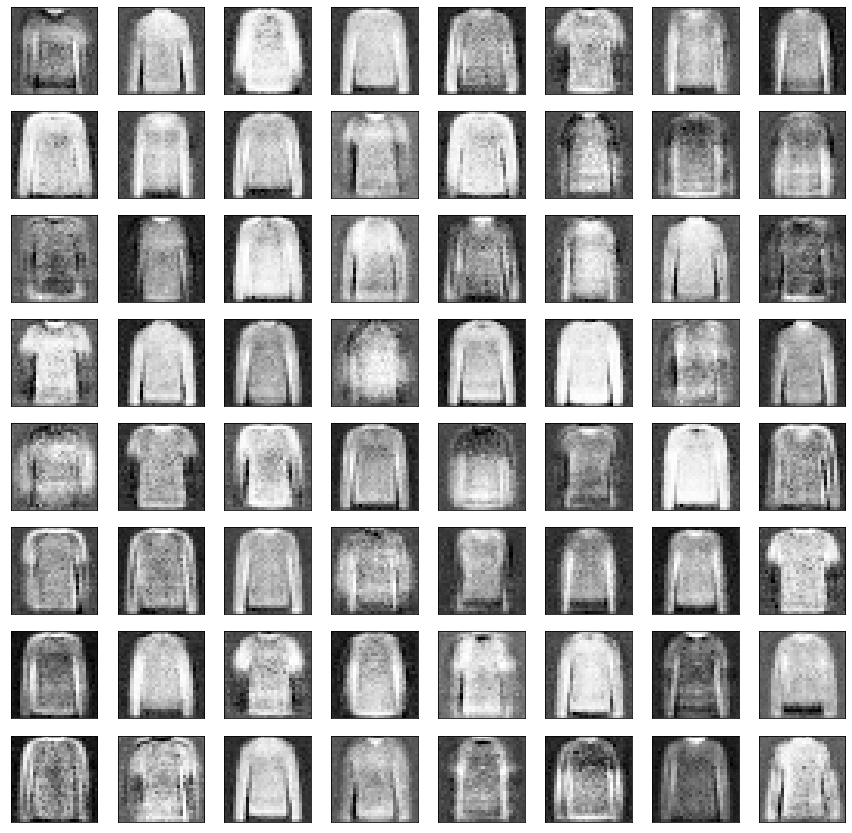

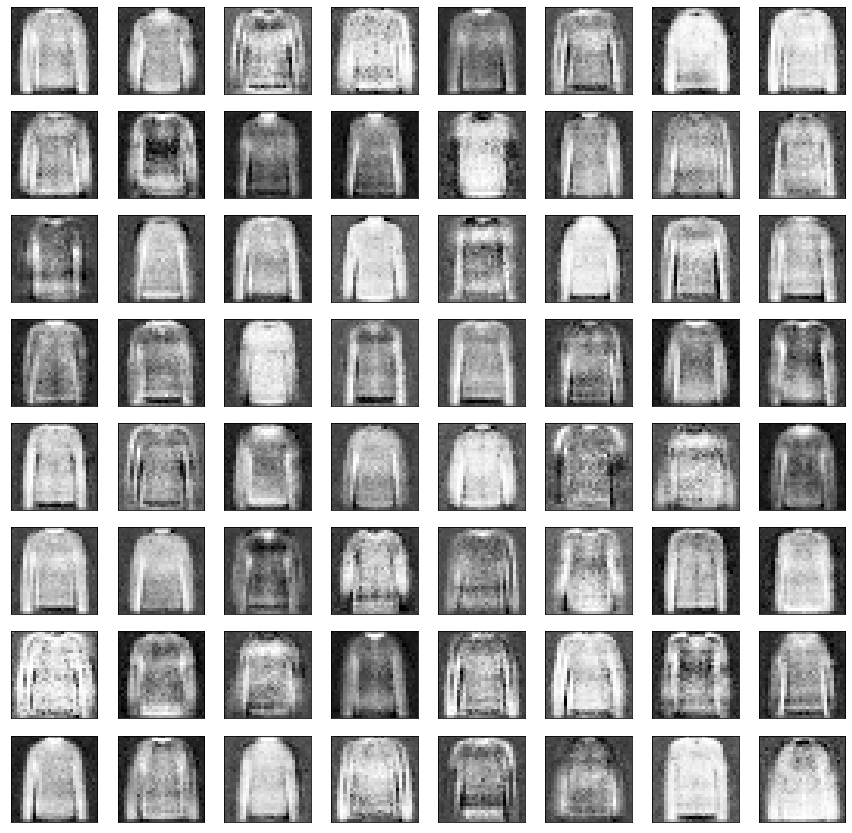

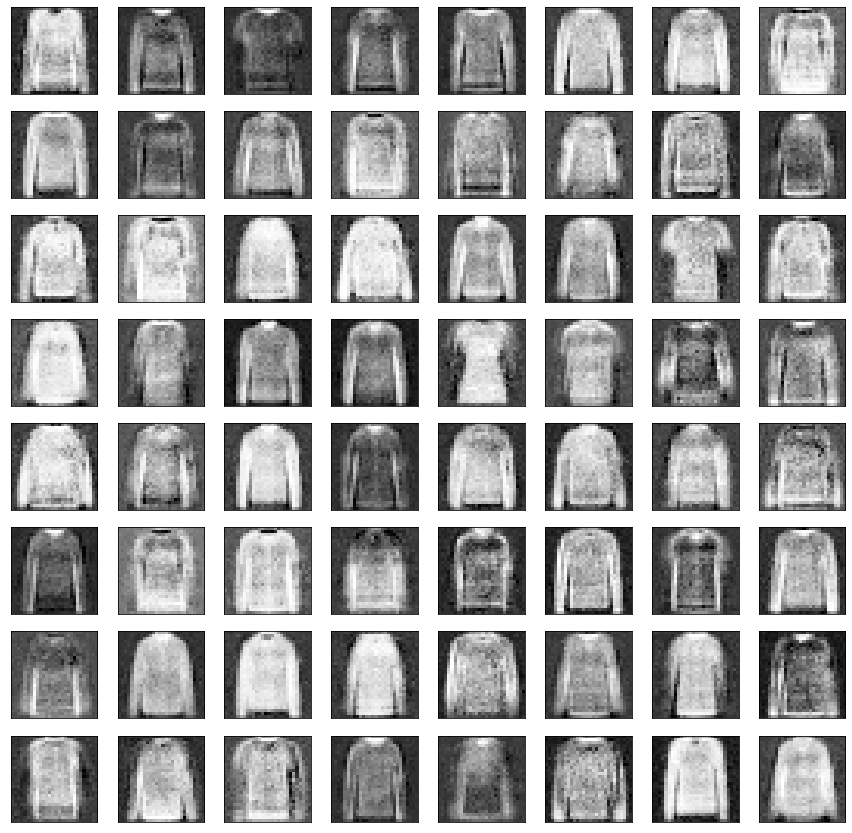

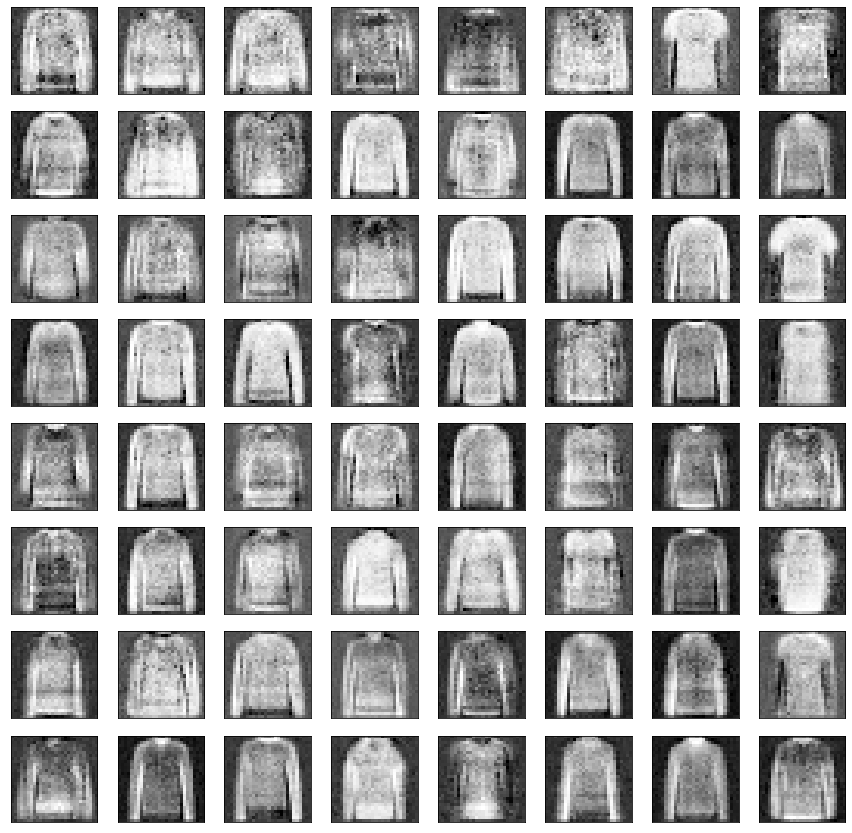

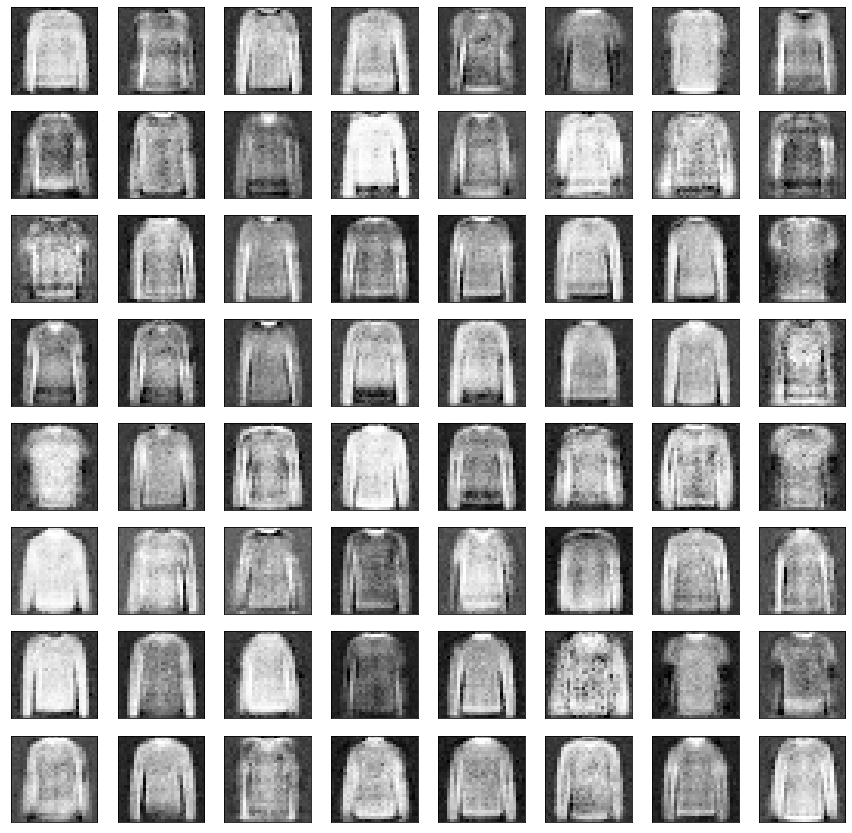

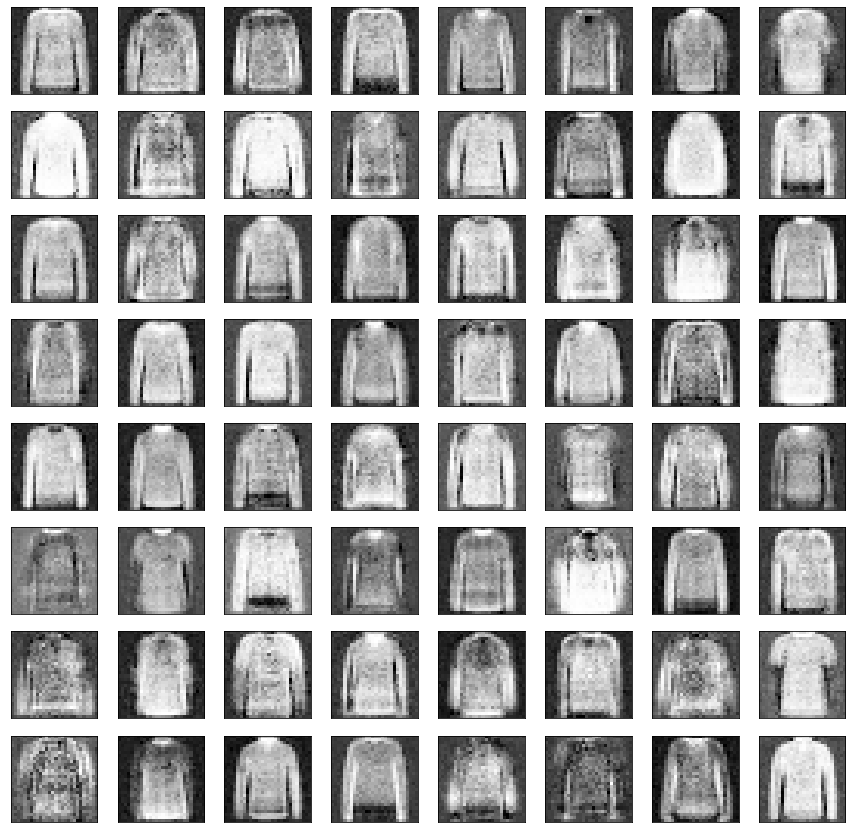

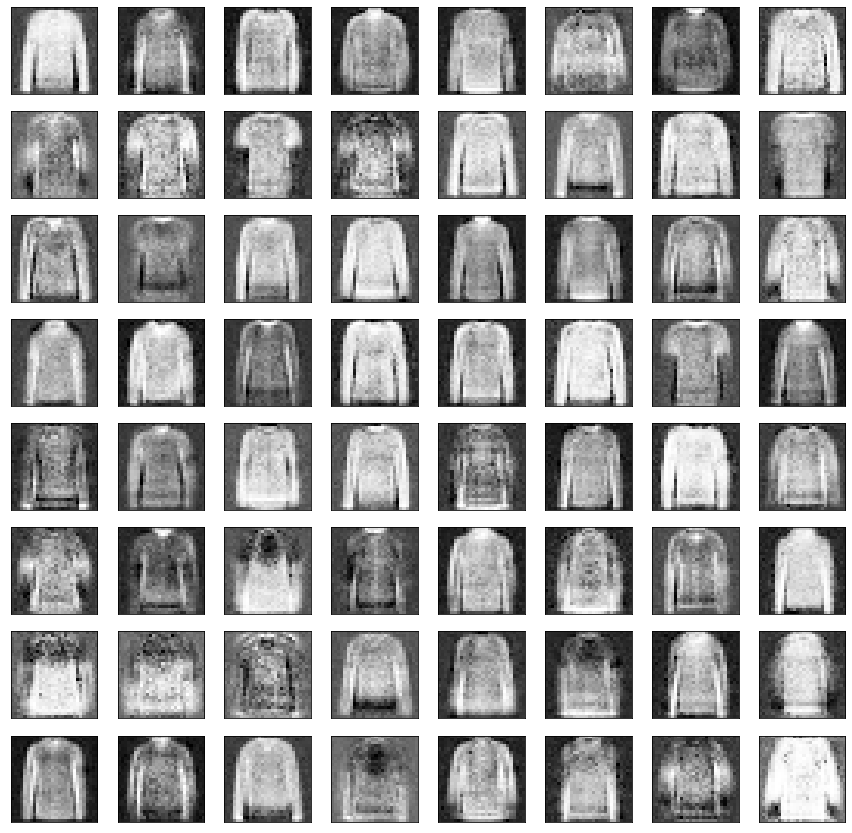

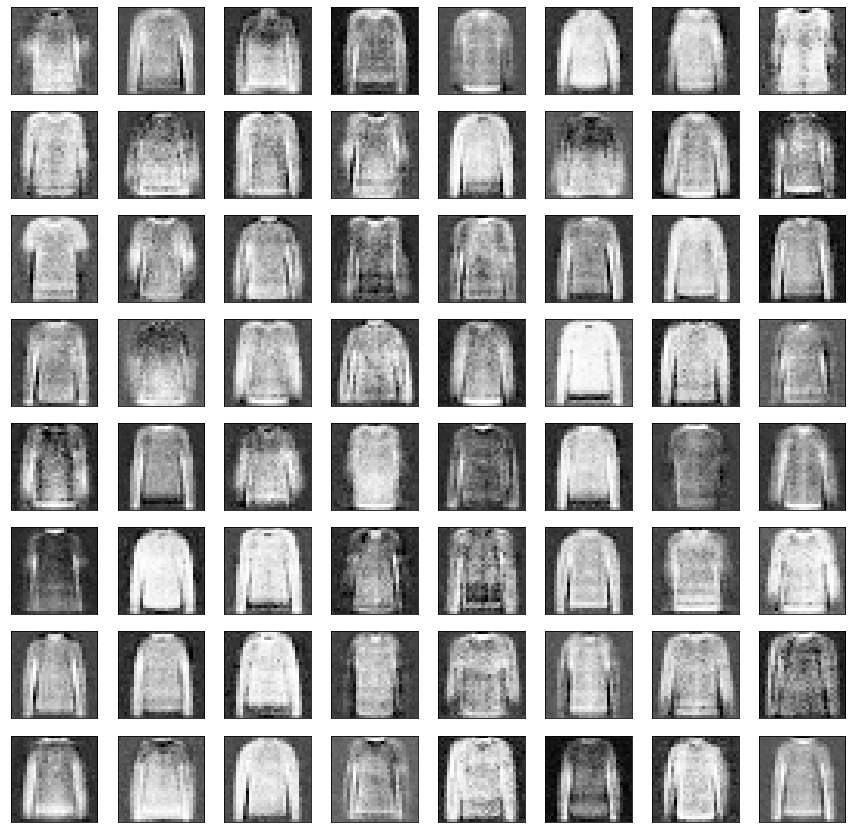

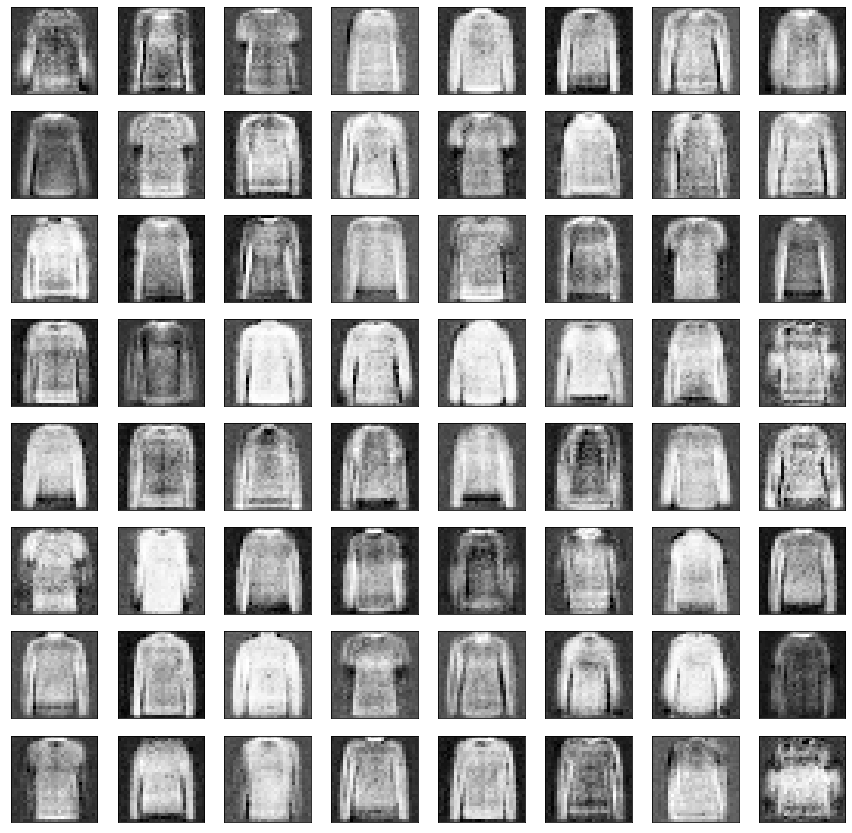

In [6]:
for epoch in range(training_parameters['n_epochs']):
    G_loss = []  # for plotting the losses over time
    D_loss = []
    for batch, (imgs, labels) in enumerate(train_loader):
        batch_size = labels.shape[0]  # if the batch size doesn't evenly divide the dataset length, this may change on the last epoch.
        lossG = train_generator(batch_size)
        G_loss.append(lossG)        
        
        lossD = train_discriminator(batch_size, imgs.reshape(batch_size, -1), labels)
        D_loss.append(lossD)
        lossD = train_discriminator(batch_size, imgs.reshape(batch_size, -1), labels)
        D_loss.append(lossD)

        if ((batch + 1) % 500 == 0 and (epoch + 1) % 1 == 0):
            # Display a batch of generated images and print the loss
            print("Training Steps Completed: ", batch)
            with torch.no_grad():  # disables gradient computation to speed things up
                noise = torch.randn(batch_size, 100).to(device)
                fake_labels = torch.randint(0, 10, (batch_size,)).to(device)
#                 generated_data = generator(noise, fake_labels).cpu().view(batch_size, 28, 28)
                generated_data = generator(noise).cpu().view(batch_size, 28, 28)

                # display generated images
                batch_sqrt = int(training_parameters['batch_size'] ** 0.5)
                fig, ax = plt.subplots(batch_sqrt, batch_sqrt, figsize=(15, 15))
                for i, x in enumerate(generated_data):
                    #ax[math.floor(i / batch_sqrt)][i % batch_sqrt].set_title(
                        # label_descriptions[int(fake_labels[i].item())]) # TODO: In 5.4 you can uncomment this line to add labels to images.
                    ax[math.floor(i / batch_sqrt)][i % batch_sqrt].imshow(x.detach().numpy(), interpolation='nearest',
                                                                          cmap='gray')
                    ax[math.floor(i / batch_sqrt)][i % batch_sqrt].get_xaxis().set_visible(False)
                    ax[math.floor(i / batch_sqrt)][i % batch_sqrt].get_yaxis().set_visible(False)
                # plt.show()
                fig.savefig(f"./results/CGAN_Generations_Epoch_{epoch}")
#                 print(D_loss)
#                 print(G_loss)
                print(
                    f"Epoch {epoch}: loss_d: {torch.mean(torch.FloatTensor(D_loss))}, loss_g: {torch.mean(torch.FloatTensor(G_loss))}")